In [1]:
import os
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend([os.path.abspath('..')])

Python 3.10.12 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 19:01:18) [MSC v.1916 64 bit (AMD64)] on win32


In [2]:
from denoising.denoising import Denoising
from denoising.atlas import Atlas
from denoising.dataset import Dataset
from denoising.helpers import *

from pathlib import Path

In [3]:
derivatives_path = r"C:\Users\user\Desktop\open_close_001\derivatives"
sub = ['001', '002']
data = Dataset(sub, derivatives_path, runs=2, task='rest')

In [4]:
user_path = os.path.expanduser("~")
atlas_path = os.path.join(user_path, 
                          Path(r'YandexDisk\IHB\Projects\OpenCloseFMRI\data\atlas\Schaefer_7N_200.nii.gz').as_posix())
atlas = Atlas(atlas_name='Schaefer200', atlas_path=atlas_path)

In [5]:
denoise = Denoising(data, atlas, 
                    strategy=1, use_GSR=False, 
                    use_cosine=True, smoothing=None)

ts = denoise.denoise()

  0%|          | 0/2 [00:00<?, ?it/s]

[NiftiLabelsMasker.wrapped] loading data from C:\Users\user\YandexDisk\IHB\Projects\OpenCloseFMRI\data\atlas\Schaefer_7N_200.nii.gz
[NiftiLabelsMasker.wrapped] loading data from C:\Users\user\YandexDisk\IHB\Projects\OpenCloseFMRI\data\atlas\Schaefer_7N_200.nii.gz
[NiftiLabelsMasker.wrapped] loading data from C:\Users\user\YandexDisk\IHB\Projects\OpenCloseFMRI\data\atlas\Schaefer_7N_200.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('C:\\Users\\user\\Desktop\\open_close_001\\derivatives\\sub-002\\func\\sub-002_task-rest_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'clean_kwargs': {},
  'detrend': True,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': array(['7Networks_LH_Vis_1', ..., '7Networks_RH_Default_pCunPCC_3'],
      dtype=object),
  'labels_img': 'C:/Users/user/YandexDisk/IH

c:\ProgramData\Anaconda3\envs\nilearn\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


_____________________________________________filter_and_extract - 281.6s, 4.7min
[NiftiLabelsMasker.wrapped] loading data from C:\Users\user\YandexDisk\IHB\Projects\OpenCloseFMRI\data\atlas\Schaefer_7N_200.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('C:\\Users\\user\\Desktop\\open_close_001\\derivatives\\sub-002\\func\\sub-002_task-rest_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'clean_kwargs': {},
  'detrend': True,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': array(['7Networks_LH_Vis_1', ..., '7Networks_RH_Default_pCunPCC_3'],
      dtype=object),
  'labels_img': 'C:/Users/user/YandexDisk/IHB/Projects/OpenCloseFMRI/data/atlas/Schaefer_7N_200.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  '

c:\ProgramData\Anaconda3\envs\nilearn\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


_____________________________________________filter_and_extract - 271.2s, 4.5min


In [7]:
fc = functional_connectivity(ts[0])

c:\ProgramData\Anaconda3\envs\nilearn\lib\site-packages\nilearn\connectome\connectivity_matrices.py:495: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
c:\ProgramData\Anaconda3\envs\nilearn\lib\site-packages\nilearn\connectome\connectivity_matrices.py:495: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = 

c:\ProgramData\Anaconda3\envs\nilearn\lib\site-packages\nilearn\plotting\matrix_plotting.py:293: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


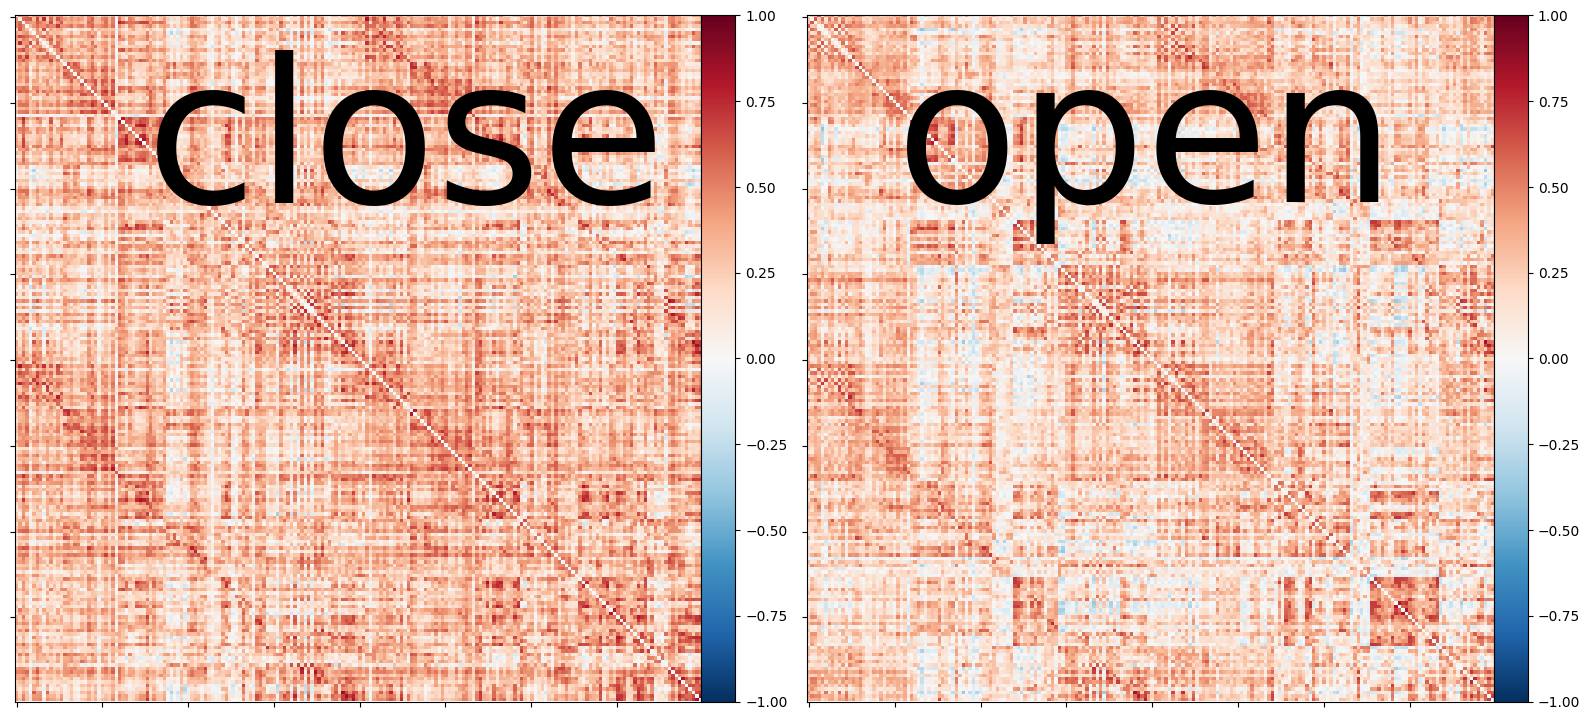

In [8]:
from nilearn import plotting

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

plotting.plot_matrix(
    fc[0],
    labels=None,
    vmax=1,
    vmin=-1,
    title="close",
    reorder=False, axes=ax1)

plotting.plot_matrix(
    fc[1],
    labels=None,
    vmax=1,
    vmin=-1,
    title="open ", 
    reorder=False, axes=ax2);
